In [1]:
# Import the libraries

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt


The initial building block of Keras is a model, and the simplest model is called `Sequential`. A sequential Keras model is a linear pipeline (a stack) of neural networks layers. This code fragment defines a single layer with 12 artificial neurons, and it expects 8 input features:


In [2]:
# Create a Single Layer Perceptron in Keras
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform'))

Each neuron can be initialized with specific weights. The most common choices provided by Keras:

- `random_uniform`: Weights are initialized to uniformly random small values in (-0.05, 0.05). In other words, any value within the given interval is equally likely to be drawn.
- `random_normal`: Weights are initialized according to a Gaussian, with a zero mean and small standard deviation of 0.05. For those of you who are not familiar with a Gaussian, think about a symmetric bell curve shape.
- `zero`: All weights are initialized to zero.

[Here](https://keras.io/initializations/) for the full list https://keras.io/initializations/ .

## Exercise 1

Define a Single Layer Perceptron in Keras with 10 as dimension of the input and 8 neurons, with only zeros as initial weights.

In [3]:
# Your code here
model = Sequential()
model.add(Dense(8, input_dim=10, kernel_initializer='zero'))

To make your model to output either 0 or 1, you have to add a line to your model:

`model.add(Dense(1, activation='sigmoid'))`

The output will be consider a neuron itself with the `sigmoid` as activation function.

## Exercise 1.1

Rewrite the Single Layer Perceptron defined in Exercise 1 so that it has the output layer.


In [4]:
# Your code here
model = Sequential()
model.add(Dense(8, input_dim=10, kernel_initializer='zero'))
model.add(Dense(1, activation='sigmoid'))


As always, to test your model, you need some data. However, meanwhile you can see if your model has been built correctly inspecting it with `model.summary()`.

In [5]:
# Run this cell, the output should be as the one you see
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Now that you have successfully build a Keras model you have to *compile* it. This is where you have to define which **loss function** you want to use, which *optimizer* (not for today), and which **metrics** you want to check. 

Why we need to specify these?
- The loss function is the "error", defined in a certain way, that your optimizer will try to minimize by updating the weights.
- You have already seen the accuracy, precision and recall metrics. They are used for understanding when to stop the training and to review the training process, but they are not used by the optimizer.

You can find some of the loss functions available in Keras here: https://keras.io/api/losses/

Since the activation function used in the last layer is a sigmoid, it means that we are building a binary classifier, so we could use the:
- `BinaryCrossentropy`: Computes the cross-entropy loss between true labels and predicted labels.
Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1). For each example, there should be a single floating-point value per prediction.




In [6]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

If you didn't get an error, it means that your model has been successsfully compiled! Now it's time to train it! I'll give you a mock dataset to play with your model. But I want your attention here: *how should the input data look like?*

Look at the input model: I asked for 10 input dimension and we output either 0 or 1. So we will have arrays of length 10 and binary labels!

In [7]:
X = np.random.rand(1000,10)
y = np.random.randint(0,2,size=(1000,))

Who's your best friend? 👇

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now... Get **fit**, stay (mentally) healthy (since you don't have to code this from scratch anymore)!

The `fit` method is for actually training your model. So you have to define the number of `epochs` and the `batch_size`:

- `epochs`: This is the number of times the model is exposed to the training set. At each iteration, the optimizer tries to adjust the weights so that the objective function is minimized.

- `batch_size`: This is the number of training instances observed before the optimizer performs a weight update.


Let's set the batch size to be 10 and the epochs 20! 

The cool thing is that you can even give a percentage of the training set as validation directly in the fit!!! This means that it will automatically test the error on the validation and gives you both the training accuracy and the validation accuracy!

In [9]:
EPOCHS = 20
BATCH_SIZE = 10

In [10]:
history = model.fit(X_train, y_train,
batch_size=BATCH_SIZE, epochs=EPOCHS,
verbose=1, validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 1s 10ms/step - loss: 0.6944 - accuracy: 0.4705 - val_loss: 0.6923 - val_accuracy: 0.5373
Epoch 2/20
54/54 [==============================] - 0s 1ms/step - loss: 0.6926 - accuracy: 0.5093 - val_loss: 0.6922 - val_accuracy: 0.5373
Epoch 3/20
54/54 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5152 - val_loss: 0.6926 - val_accuracy: 0.5373
Epoch 4/20
54/54 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5236 - val_loss: 0.6929 - val_accuracy: 0.5373
Epoch 5/20
54/54 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5452 - val_loss: 0.6941 - val_accuracy: 0.4701
Epoch 6/20
54/54 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5428 - val_loss: 0.6938 - val_accuracy: 0.5299
Epoch 7/20
54/54 [==============================] - 0s 1ms/step - loss: 0.6902 - accuracy: 0.5322 - val_loss: 0.6945 - val_accuracy: 0.5075
Epoch 8/20
54/54 [=

Now let's test on the test data:

In [11]:
score = model.evaluate(X_test, y_test, verbose=1)
print(f"{model.metrics_names[0]}:", score[0])
print(f"{model.metrics_names[1]}", score[1])

11/11 [==============================] - 0s 748us/step - loss: 0.7058 - accuracy: 0.4636
loss: 0.7058038711547852
accuracy 0.4636363685131073


The performance is super low because we gave random data! But you can try on real data!

If you want to manually inspect the values of the prediction you can use the `predict` method:


In [12]:
np.random.seed(42)
pred = model.predict(np.random.rand(1,10))
pred

array([[0.53168523]], dtype=float32)

As you can see, the output is a "double" array. So if you want to get the number inside it you could access it adding `[0][0]`:

In [13]:
pred[0][0]

0.53168523

But this is the a float! You want 0 or 1! True, you could round the prediction if you want, with threshold 0.5. Or use the predict_classes method:

In [14]:
np.random.seed(42)

pred_classes = model.predict_classes(np.random.rand(1,10))
pred_classes

/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]], dtype=int32)

Since the `predict_classes` method is deprecated, it's not convenient to use it for a maintainable code. So better to check the class manually using a threshold!

# BIGGER NETWORKS

You can add as many layers you(r RAM) want(s) in your neural network! Before we used only one! It's as simple as adding 

`model.add(Dense(N_HIDDEN))`

between the the layers!

In [15]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform'))
model.add(Dense(100))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1300      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,509
Trainable params: 1,509
Non-trainable params: 0
_________________________________________________________________


The rest, is exactly the same of before!

## Now it's your turn!

I'll give you some input data, and I want you to create a neural network with:

- `input_dim` : adeguate to fit the data I will provide you
- 32 neurons in the input layer
- 64 neurons in the first hidden layer
- 32 neuron in the second hidden layer
- a binary output layer with the sigmoid

You're free to choose the rest of the parameters!

In [17]:
np.random.seed(42)
X = np.random.rand(1000, 20)
y = np.random.randint(0, 2, size=1000)

In [18]:
# Your code here
model = Sequential(name='my_sequential')
model.add(Dense(32, input_dim=20, kernel_initializer='random_uniform', name='kernal_initializer'))
model.add(Dense(64, activation='relu', name='layer1_64_relu'))
model.add(Dense(32, activation='relu', name='layer2_64_relu'))
model.add(Dense(1, activation='sigmoid', name='output_sigmoid'))

model.summary()

Model: "my_sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
kernal_initializer (Dense)   (None, 32)                672       
_________________________________________________________________
layer1_64_relu (Dense)       (None, 64)                2112      
_________________________________________________________________
layer2_64_relu (Dense)       (None, 32)                2080      
_________________________________________________________________
output_sigmoid (Dense)       (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, epochs=90, verbose=1, validation_split=0.2)

np.random.seed(42)
pred_x = np.random.rand(1, 20)
pred_y = model.predict(pred_x)

Epoch 1/90
6/6 [==============================] - 1s 32ms/step - loss: 0.6930 - accuracy: 0.5376 - val_loss: 0.6957 - val_accuracy: 0.5149
Epoch 2/90
6/6 [==============================] - 0s 10ms/step - loss: 0.6926 - accuracy: 0.5156 - val_loss: 0.6956 - val_accuracy: 0.5149
Epoch 3/90
6/6 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5321 - val_loss: 0.6947 - val_accuracy: 0.5075
Epoch 4/90
6/6 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.5378 - val_loss: 0.6967 - val_accuracy: 0.5149
Epoch 5/90
6/6 [==============================] - 0s 9ms/step - loss: 0.6872 - accuracy: 0.5341 - val_loss: 0.6948 - val_accuracy: 0.4328
Epoch 6/90
6/6 [==============================] - 0s 8ms/step - loss: 0.6873 - accuracy: 0.5666 - val_loss: 0.6966 - val_accuracy: 0.5149
Epoch 7/90
6/6 [==============================] - 0s 8ms/step - loss: 0.6872 - accuracy: 0.5539 - val_loss: 0.6955 - val_accuracy: 0.4552
Epoch 8/90
6/6 [================

In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


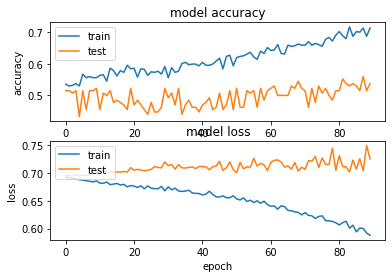

In [35]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

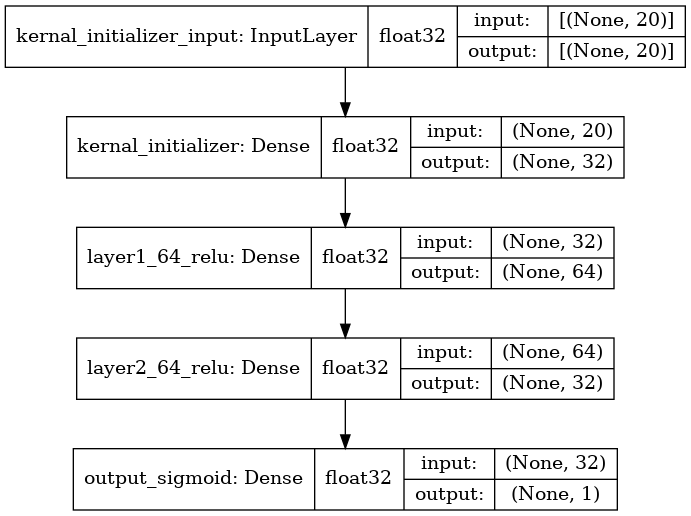

In [36]:
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=44192bfb-fecf-4bf0-b979-a423a8f67f36' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>